In [1]:
import os
path=os.getcwd()
os.chdir('lib')
from flood_model.forecast import Forecast
import traceback
import time
import datetime
from flood_model.settings import *
from flood_model.dynamicDataDb import DatabaseManager as dbm
try:
    from flood_model.secrets import *
except ImportError:
    print('No secrets file found.')
from flood_model.exposure import Exposure 
#import resource
import os
import logging
import zipfile
from google_drive_downloader import GoogleDriveDownloader as gdd
os.chdir(path)   


# Set up logger
logging.root.handlers = []
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG, filename='ex.log')
# set up logging to console
console = logging.StreamHandler()
console.setLevel(logging.INFO)
# set a format which is simpler for console use
formatter = logging.Formatter('%(asctime)s : %(levelname)s : %(message)s')
console.setFormatter(formatter)
logging.getLogger("").addHandler(console)

No environment variables found.
No access to Azure Key vault, skipping.


In [2]:
startTime = time.time()
logger = logging.getLogger(__name__)
 
logger.info(str(datetime.datetime.now()))
## download data from Datalacke 


2022-12-02 13:43:24,950 : INFO : 2022-12-02 13:43:24.950155


In [3]:
COUNTRY_CODES

['SSD']

In [ ]:

if len(COUNTRY_CODES)==1 and COUNTRY_CODES[0]=='PHL':
    dbm_ = dbm('7-day', 'PHL',3)
    filename='data_phl.zip'
    path = 'flood/Gold/datapipeline/'+ filename
    #admin_area_json1['geometry'] = admin_area_json1.pop('geom')
    DataFile = dbm_.getDataFromDatalake(path)
    if DataFile.status_code >= 400:
        raise ValueError()
    open('./' + filename, 'wb').write(DataFile.content)
    path_to_zip_file='./'+filename
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall('./data')
else:
    dbm_ = dbm('7-day', 'ETH',3)
    filename='data.zip'
    path = 'flood/Gold/datapipeline/'+ filename
    #admin_area_json1['geometry'] = admin_area_json1.pop('geom')
    DataFile = dbm_.getDataFromDatalake(path)
    if DataFile.status_code >= 400:
        raise ValueError()
    open('./' + filename, 'wb').write(DataFile.content)
    path_to_zip_file='./'+filename
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall('./data')


In [4]:




#gdd.download_file_from_google_drive(file_id=GOOGLE_DRIVE_DATA_URL,dest_path='./data/data_flood.zip',overwrite=True,unzip=True)
logger.info('finished data download')

logger.info(str(datetime.datetime.now()))



2022-12-02 13:43:32,765 : INFO : finished data download
2022-12-02 13:43:32,766 : INFO : 2022-12-02 13:43:32.766959


2022-12-02 13:43:35,714 : INFO : --------STARTING: SSD--------------------------
2022-12-02 13:43:35,716 : INFO : --------STARTING: 7-day--------------------------
c:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\IBF_FLOOD_PIPELINE\pipeline\lib\flood_model\forecast.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.rename(columns={"placeCode": f"placeCode_{adm_level}","placeCodeParent": f"placeCodeParent_{adm_level}"},inplace=True)
2022-12-02 13:43:38,352 : INFO : 
Extracting Glofas (mock) Data

2022-12-02 13:43:38,367 : INFO : G5100
2022-12-02 13:43:38,372 : INFO : Extracted Glofas data - File saved
2022-12-02 13:43:38,374 : INFO : Extracted Glofas data - Trigger per day File saved
2022-12-02 13:43:38,394 : INFO : Processed Glofas data - File saved
2022-12-02 13:43:38,396 : INFO : 

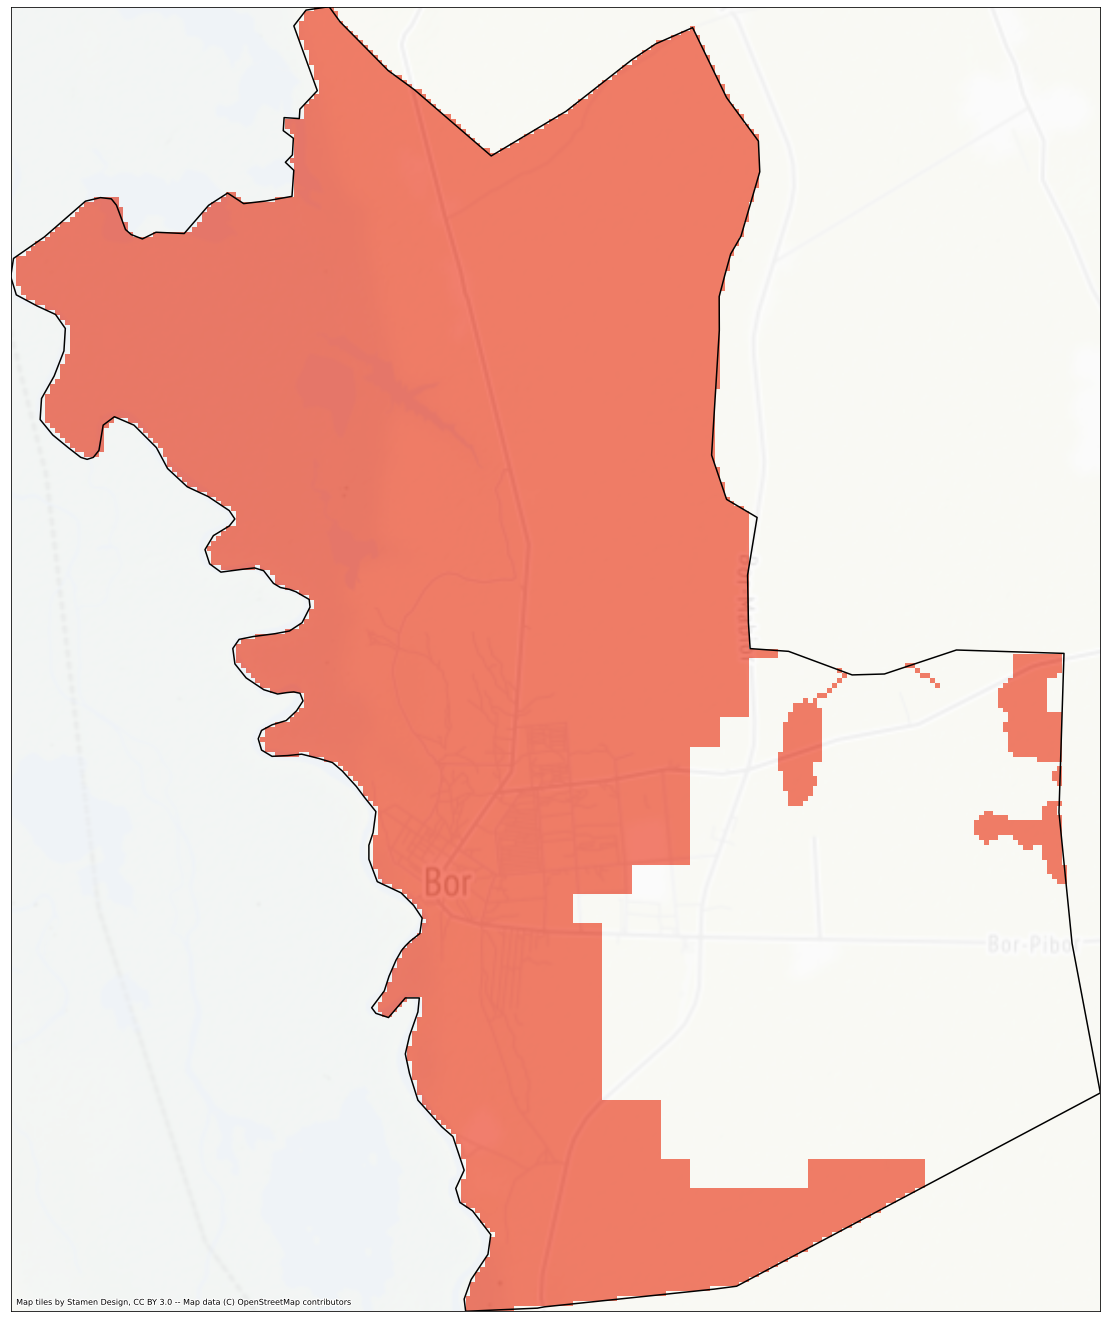

In [5]:

for COUNTRY_CODE in COUNTRY_CODES:
    logger.info(f'--------STARTING: {COUNTRY_CODE}' + '--------------------------')
    COUNTRY_SETTINGS = SETTINGS[COUNTRY_CODE]
    LEAD_TIMES = COUNTRY_SETTINGS['lead_times']

    for leadTimeLabel, leadTimeValue in LEAD_TIMES.items():
        logger.info(f'--------STARTING: {leadTimeLabel}' + '--------------------------')
        fc = Forecast(leadTimeLabel, leadTimeValue, COUNTRY_CODE,COUNTRY_SETTINGS['admin_level'])
        fc.glofasData.process()
        logger.info('--------Finished GLOFAS data Processing')
        fc.floodExtent.calculate()
        logger.info('--------Finished flood extent')
        fc.exposure.callAllExposure()
        logger.info('--------Finished exposure')
        if COUNTRY_CODE =='SSD':
            fc.exposure.makeMaps()
            logger.info('--------Finished make maps')                
        fc.db.upload()                
        logger.info('--------Finished upload')
        fc.db.sendNotification()
        logger.info('--------Finished notification')
 
    elapsedTime = str(time.time() - startTime)
    logger.info(str(elapsedTime))


In [ ]:
dffinal = pd.concat(dfs)

In [ ]:
df3=dffinal.groupby('storm_id').agg(DMG_predicted_total=('DMG_predicted','sum')).reset_index()
df3.DMG_predicted_total.values

In [ ]:
np.mean(dffinal.DMG_predicted_t.values)

In [ ]:


Yauyos=dffinal['DMG_predicted_t']
 
Yauyos[Yauyos>0].hist(bins=100, edgecolor='#4aaaaa', color='#80BCD8')
import matplotlib.pyplot as plt

plt.plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
#plt.xlim(0,30)
plt.legend(loc='upper right')


In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import genextreme
Yauyos=dffinal.DMG_predicted_t.values
#hallamos el promedio y la desviación
promedio = Yauyos[Yauyos>0].mean()
desviacion = Yauyos[Yauyos>0].std()
print (promedio, desviacion)

#determinamos las regresiones estadisticas
tabulaciones = np.arange(-40,51,0.1)
distnormal = stats.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = stats.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = stats.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = stats.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

p100y_norm = stats.norm.ppf([0.99], loc=promedio, scale=desviacion)
p100y_lognorm = stats.pearson3.ppf([0.99], skew=1, loc=promedio, scale=desviacion)


for values in[0.5,0.8,0.857142857,0.9,0.933333333,0.95,0.96,0.966666667,0.975,0.98,0.983333333,0.9875,0.99,0.993333333,0.995]:
    year=int((1/(1-values)))
    p100y_lognorm = stats.pearson3.ppf([values], skew=1, loc=promedio, scale=desviacion)
    print (f"damage for {year} return period Dist Logormal =", int(p100y_lognorm[0]))



In [ ]:

data = df3.DMG_predicted_total.values
# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Return levels:")
print()
print("Period    Level")
print("(years)   (temp)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')